# Linear Regression 

- Dataset: bike sharing dataset- 서울시 공용자전거(2017-2018)
- 수정중

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import missingno as msno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# data
bike = pd.read_csv("datas/SeoulBikeData.csv", encoding='cp949')
bike

Date  Rented Bike Count  Hour  Temperature(캜)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(캜)  \
0                  2.2              2000                     -17.6   
1                  0.8              2000                     -17.6   
2                  1.0              2000                     -17.7   
3                  0.9              2000                     -17.6   
4                  2.3              2000                     -18.6   
...                ...               ...                       ...   
8755               2.6              1894                     -10.3   
8756               2.3              2000                      -9.9   
8757               0.3              1968                      -9.9   
8758               1.0              1859                      -9.8   
8759               1.3              1909                      -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

<AxesSubplot:>

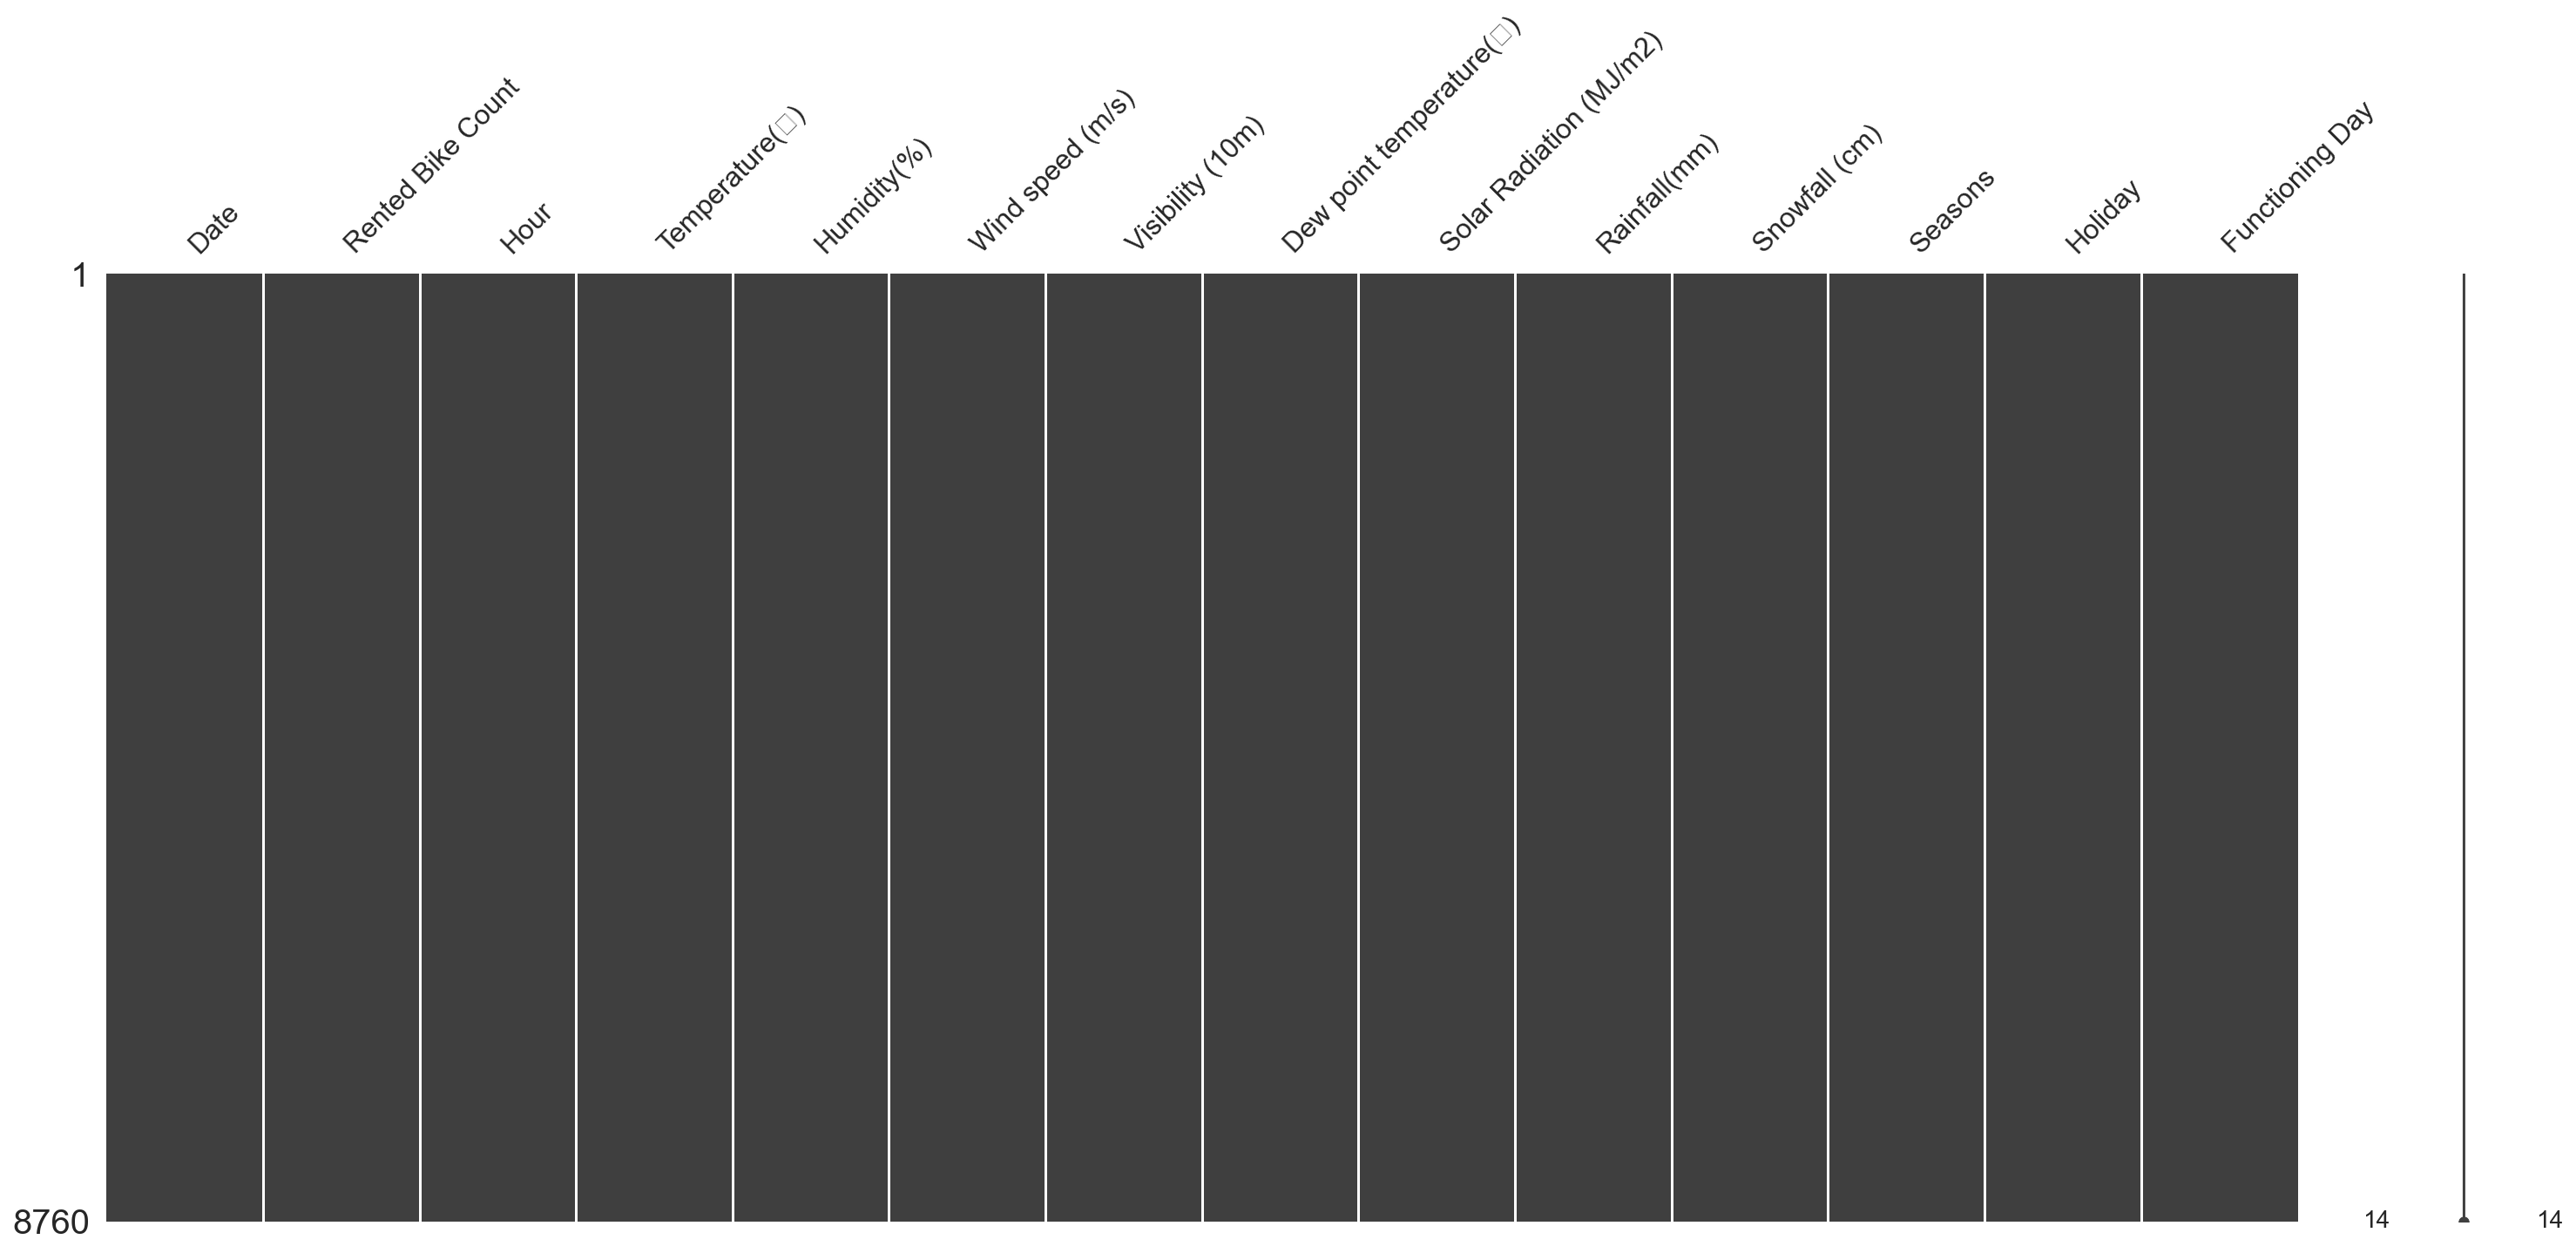

In [3]:
#결측치 확인
msno.matrix(bike)

In [4]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Feature Selection

In [5]:
bike.drop(['Dew point temperature(캜)', 'Solar Radiation (MJ/m2)', 'Functioning Day'], axis=1, inplace=True)
bike.rename(columns={"Temperature(캜)": "Temperature(℃)" }, inplace=True)

bike

Date  Rented Bike Count  Hour  Temperature(℃)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                  2.2              2000           0.0            0.0  Winter   
1                  0.8              2000           0.0            0.0  Winter   
2                  1.0              2000           0.0            0.0  Winter   
3                  0.9              2000           0.0            0.0  Winter   
4                  2.3              2000           0.0            0.0  Winter   
...                ...               ...           ...            ...     ...   
8755               2.6              1894           0.0            0.0  Autumn   
8756               2.3              2000           0.0            0.0  Autumn   
8757               0.3              1968           0.0            0.0  Autumn   
8758               1.0              1859           0.0            0.0  Autumn   
8759               1.3              1909           0.0            0.0  Autumn   

         Holiday  
0     No Holiday  
1     No Holiday  
2     No Holiday  
3     No Holiday  
4     No Holiday  
...          ...  
8755  No Holiday  
8756  No Holiday  
8757  No Holiday  
8758  No Holiday  
8759  No Holiday  

[8760 rows x 11 columns]

### 연, 월 정보정리

In [6]:
bike['Date']= pd.to_datetime(bike['Date'], format='%d/%m/%Y')
bike['Date'].dtype      

dtype('<M8[ns]')

In [7]:
bike['year'] = pd.DatetimeIndex(bike['Date']).year
bike['month'] = pd.DatetimeIndex(bike['Date']).month

In [8]:
bike.drop(['Date'], axis=1, inplace=True)

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(℃)     8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
 5   Visibility (10m)   8760 non-null   int64  
 6   Rainfall(mm)       8760 non-null   float64
 7   Snowfall (cm)      8760 non-null   float64
 8   Seasons            8760 non-null   object 
 9   Holiday            8760 non-null   object 
 10  year               8760 non-null   int64  
 11  month              8760 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 821.4+ KB


In [10]:
code1={'Winter':1, 'Spring':2, 'Summer':3, "Autumn": 4}
bike['Seasons']=bike['Seasons'].map(code1)

In [11]:
code2={'No Holiday':1, 'Holiday':2}
bike['Holiday']=bike['Holiday'].map(code2)

In [12]:
bike['Seasons']

0       1
1       1
2       1
3       1
4       1
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Seasons, Length: 8760, dtype: int64

In [13]:
# 형변환 ()
#bike = bike.apply(pd.to_numeric, errors='coerce')
bike['Seasons']=bike['Seasons'].astype('float')
bike['Holiday']=bike['Holiday'].astype('float')

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(℃)     8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
 5   Visibility (10m)   8760 non-null   int64  
 6   Rainfall(mm)       8760 non-null   float64
 7   Snowfall (cm)      8760 non-null   float64
 8   Seasons            8760 non-null   float64
 9   Holiday            8760 non-null   float64
 10  year               8760 non-null   int64  
 11  month              8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


### 하아그ㅜㅜㅜ ....

In [15]:
import plotly.express as px

fig = px.histogram(bike, x ="Rented Bike Count")
fig.show()

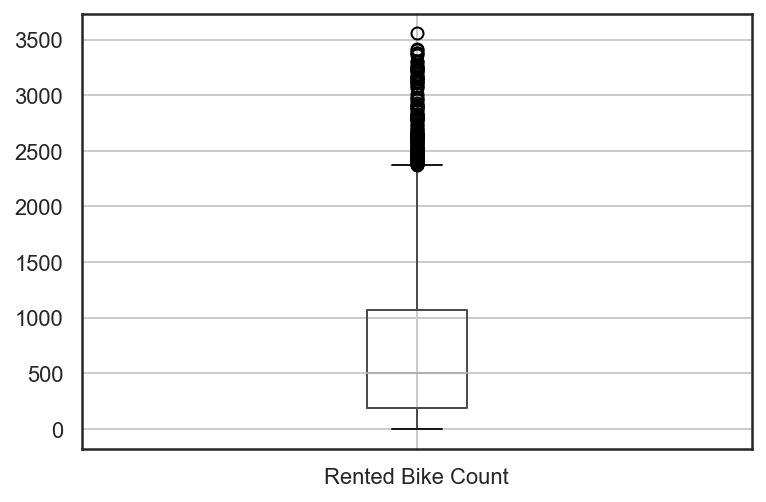

In [16]:
bike.boxplot(column=["Rented Bike Count"]);

In [17]:
bike["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

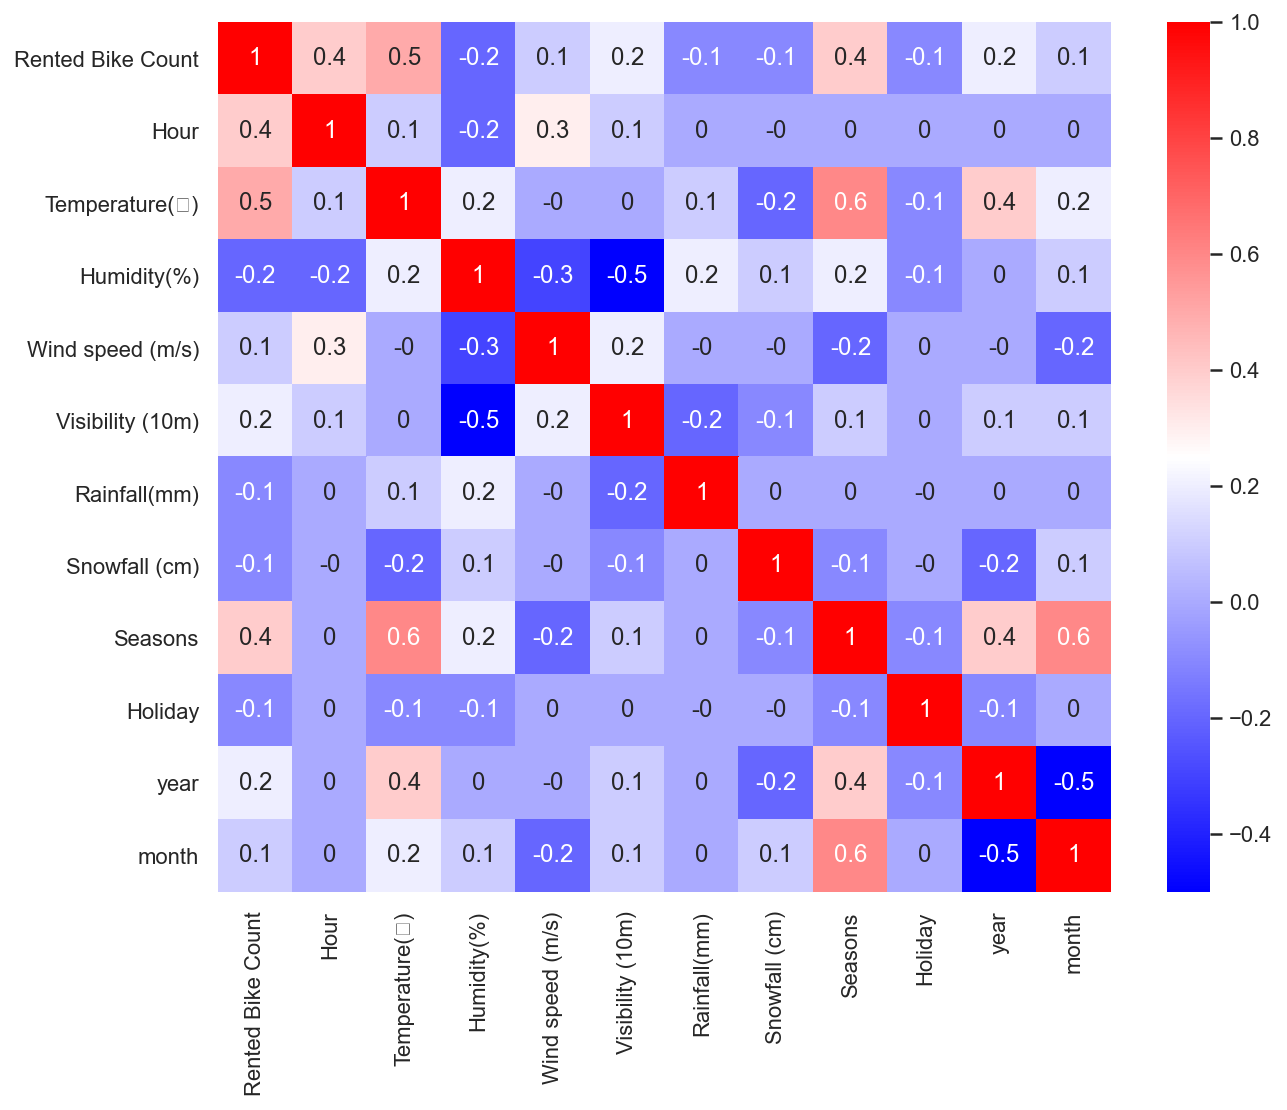

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = bike.corr().round(1)
sns.set(rc={'figure.figsize' :(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

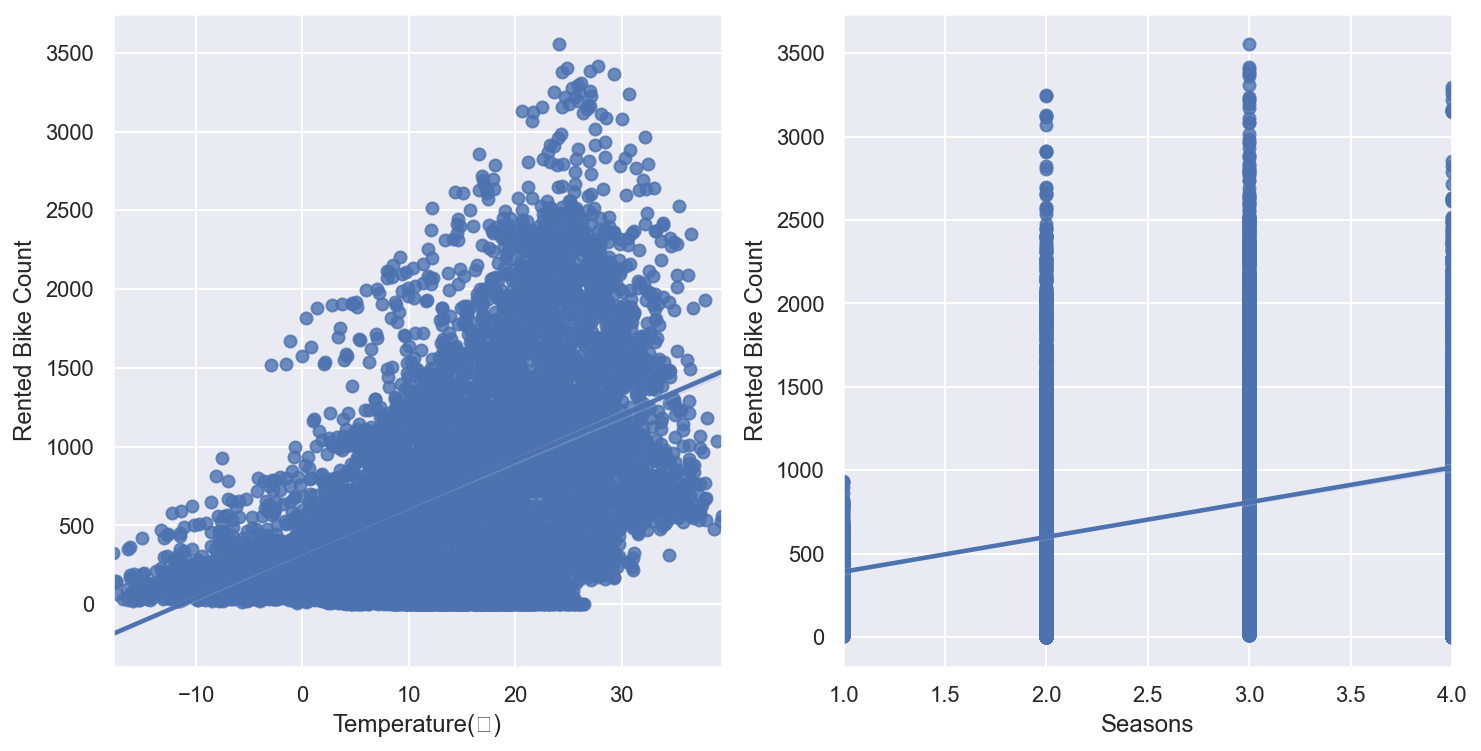

In [19]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='Temperature(℃)', y='Rented Bike Count', data=bike, ax=ax[0])
sns.regplot(x='Seasons', y='Rented Bike Count', data=bike, ax=ax[1]);

In [20]:
from sklearn.model_selection import train_test_split
x = bike.drop('Rented Bike Count', axis=1)
y = bike['Rented Bike Count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                           random_state=13)
np.unique(y_train, return_counts=True)

(array([   0,    2,    3, ..., 3404, 3418, 3556], dtype=int64),
 array([247,   1,   1, ...,   1,   1,   1], dtype=int64))

### 선형회귀 모델 만들기

In [21]:
import statsmodels.api as sm

lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              2003.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                        0.00
Time:                        09:01:55   Log-Likelihood:                         -53014.
No. Observations:                7008   AIC:                                  1.060e+05
Df Residuals:                    6997   BIC:                                  1.061e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Hour                28.2070      0.872     32.358      0.000      26.498      29.916
Temperature(℃)      24.8005      0.610     40.682      0.000      23.605      25.995
Humidity(%)         -6.0262      0.370    -16.280      0.000      -6.752      -5.301
Wind speed (m/s)     1.4161      5.923      0.239      0.811     -10.195      13.027
Visibility (10m)     0.0232      0.011      2.043      0.041       0.001       0.045
Rainfall(mm)       -55.7445      4.905    -11.365      0.000     -65.360     -46.129
Snowfall (cm)       13.6234     13.439      1.014      0.311     -12.722      39.968
Seasons             75.7524      7.740      9.787      0.000      60.579      90.925
Holiday           -161.3491     25.494     -6.329      0.000    -211.325    -111.373
year                 0.1855      0.023      8.056      0.000       0.140       0.231
month               -2.4326      2.050     -1.187      0.235      -6.452       1.586
==============================================================================
Omnibus:                      873.023   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1859.871
Skew:                           0.764   Prob(JB):                         0.00
Kurtosis:                       5.009   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              2003.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                        0.00
Time:                        09:01:55   Log-Likelihood:                         -53014.
No. Observations:                7008   AIC:                                  1.060e+05
Df Residuals:                    6997   BIC:                                  1.061e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Hour                28.2070      0.872     32.358      0.000      26.498      29.916
Temperature(℃)      24.8005      0.610     40.682      0.000      23.605      25.995
Humidity(%)         -6.0262      0.370    -16.280      0.000      -6.752      -5.301
Wind speed (m/s)     1.4161      5.923      0.239      0.811     -10.195      13.027
Visibility (10m)     0.0232      0.011      2.043      0.041       0.001       0.045
Rainfall(mm)       -55.7445      4.905    -11.365      0.000     -65.360     -46.129
Snowfall (cm)       13.6234     13.439      1.014      0.311     -12.722      39.968
Seasons             75.7524      7.740      9.787      0.000      60.579      90.925
Holiday           -161.3491     25.494     -6.329      0.000    -211.325    -111.373
year                 0.1855      0.023      8.056      0.000       0.140       0.231
month               -2.4326      2.050     -1.187      0.235      -6.452       1.586
==============================================================================
Omnibus:                      873.023   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1859.871
Skew:                           0.764   Prob(JB):                         0.00
Kurtosis:                       5.009   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 예측

In [23]:
predictions = lm.predict(x_test)
predictions

7043     714.015122
5999    1367.065933
2276     732.605082
961     -217.163531
7548    1022.372327
           ...     
1005     313.003718
2714     254.130494
5039    1041.191678
4642     984.236625
4163     929.897608
Length: 1752, dtype: float64

In [24]:
y_test

7043     111
5999    1136
2276     578
961       78
7548     967
        ... 
1005     162
2714     305
5039     931
4642     971
4163    1012
Name: Rented Bike Count, Length: 1752, dtype: int64

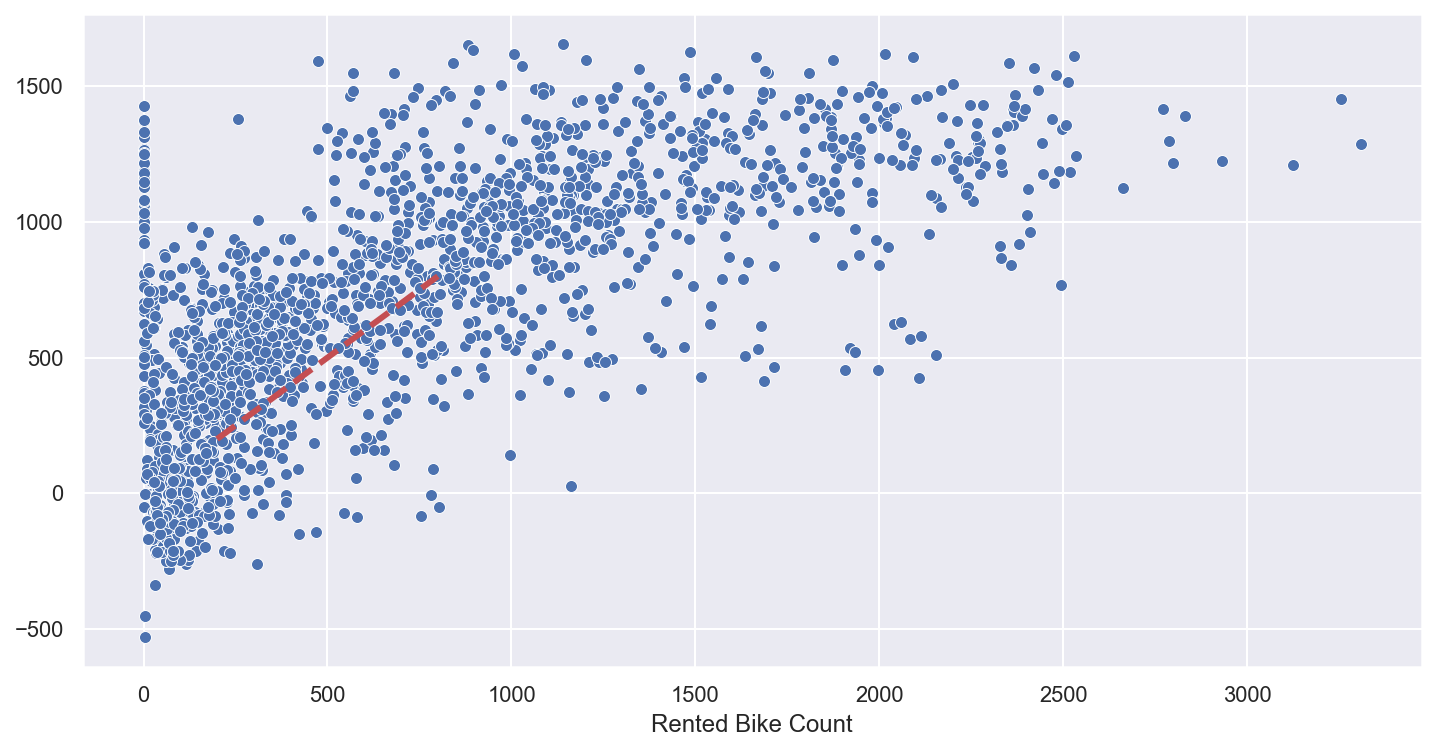

In [25]:
sns.scatterplot(y_test,predictions);
plt.plot([200,800], [200, 800], 'r', ls='dashed', lw=3);

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(x_train)
pred_test = reg.predict(x_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  464.8168569496298
RMSE of Test Data:  468.5434153421501
